1/200
2/200
3/200
4/200
5/200
6/200
7/200
8/200
9/200
10/200
11/200
12/200
13/200
14/200
15/200
16/200
17/200
18/200
19/200
20/200
21/200
22/200
23/200
24/200
25/200
26/200
27/200
28/200
29/200
30/200
31/200
32/200
33/200
34/200
35/200
36/200
37/200
38/200
39/200
40/200
41/200
42/200
43/200
44/200
45/200
46/200
47/200
48/200
49/200
50/200
51/200
52/200
53/200
54/200
55/200
56/200
57/200
58/200
59/200
60/200
61/200
62/200
63/200
64/200
65/200
66/200
67/200
68/200
69/200
70/200
71/200
72/200
73/200
74/200
75/200
76/200
77/200
78/200
79/200
80/200
81/200
82/200
83/200
84/200
85/200
86/200
87/200
88/200
89/200
90/200
91/200
92/200
93/200
94/200
95/200
96/200
97/200
98/200
99/200
100/200
101/200
102/200
103/200
104/200
105/200
106/200
107/200
108/200
109/200
110/200
111/200
112/200
113/200
114/200
115/200
116/200
117/200
118/200
119/200
120/200
121/200
122/200
123/200
124/200
125/200
126/200
127/200
128/200
129/200
130/200
131/200
132/200
133/200
134/200
135/200
136/200
137/200
138/200
139/

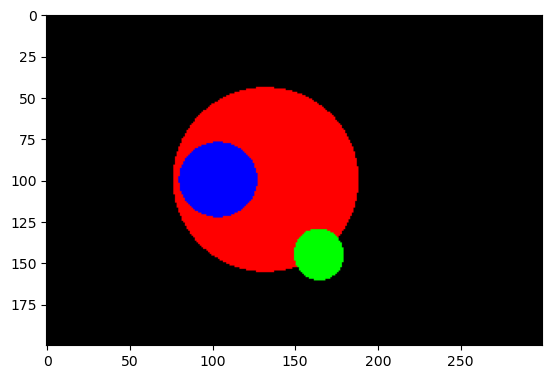

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalizar(vector):
    return vector / np.linalg.norm(vector)  # norma del vector

def interseccion_esfera(centro, radio, origen_rayo, direccion_rayo):  # calcular t
    a = np.dot(direccion_rayo, direccion_rayo)  # producto punto
    b = 2 * np.dot(direccion_rayo, origen_rayo - centro)
    c = np.dot(origen_rayo - centro, origen_rayo - centro) - radio ** 2
    delta = b ** 2 - 4 * a * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / (2 * a)
        t2 = (-b - np.sqrt(delta)) / (2 * a)
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

def objeto_intersectado_mas_cercano(objetos, origen_rayo, direccion_rayo):
    distancias = [interseccion_esfera(obj['centro'], obj['radio'], origen_rayo, direccion_rayo) for obj in objetos]
    objeto_mas_cercano = None
    distancia_minima = np.inf  # infinito positivo
    for indice, distancia in enumerate(distancias):
        if distancia and distancia < distancia_minima:
            distancia_minima = distancia
            objeto_mas_cercano = objetos[indice]
    return objeto_mas_cercano, distancia_minima

ancho = 300
alto = 200
camara = np.array([0, 0, 1])
proporcion = float(ancho) / alto
pantalla = (-1, 1 / proporcion, 1, -1 / proporcion)  # izquierda, arriba, derecha, abajo

objetos = [
    {'centro': np.array([-0.2, 0, -1]), 'radio': 0.7, 'color': [255, 0, 0]},
    {'centro': np.array([0.1, -0.3, 0]), 'radio': 0.1, 'color': [0, 255, 0]},
    {'centro': np.array([-0.3, 0, 0]), 'radio': 0.15, 'color': [0, 0, 255]}
]

imagen = np.zeros((alto, ancho, 3))

for i, y in enumerate(np.linspace(pantalla[1], pantalla[3], alto)):
    for j, x in enumerate(np.linspace(pantalla[0], pantalla[2], ancho)):
        pixel = np.array([x, y, 0])
        origen = camara
        direccion = normalizar(pixel - origen)
        # chequear por intersecciones
        objeto_mas_cercano, distancia_minima = objeto_intersectado_mas_cercano(objetos, origen, direccion)
        if objeto_mas_cercano is None:
            continue
        # computar el punto de intersección entre el rayo y el objeto mas cercano
        interseccion = origen + distancia_minima * direccion
        color = objeto_mas_cercano['color']
        imagen[i, j] = np.clip(color, 0, 255) / 255

    print("%d/%d" % (i + 1, alto))

plt.imsave('imagen.png', imagen)
imgplot = plt.imshow(imagen)
plt.show()


In [1]:
import numpy as np

def interseccion_triangulo(vertice0, vertice1, vertice2, origen_rayo, direccion_rayo):
    EPSILON = 0.0000001
    EDGE1 = vertice1 - vertice0
    EDGE2 = vertice2 - vertice0
    H = np.cross(direccion_rayo, EDGE2)
    A = np.dot(EDGE1, H)
    if A > -1 * EPSILON and A < EPSILON:
        return None
    F = 1.0 / A
    S = origen_rayo - vertice0
    U = F * np.dot(S, H)
    if U < 0.0 or U > 1.0:
        return None
    Q = np.cross(S, EDGE1)
    V = F * np.dot(direccion_rayo, Q)
    if V < 0.0 or U + V > 1.0:
        return None
    T = F * np.dot(EDGE2, Q)
    if T > EPSILON:
        print(T)
        return T

objetos = [
    {'vertice0': np.array([-0.5, 0, -1]), 'vertice1': np.array([0.5, 0, -1]), 'vertice2': np.array([0, 0.5, -1]), 'color': [255, 0, 0]}
]


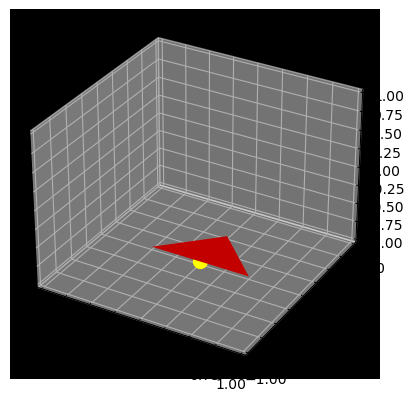

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def interseccion_triangulo(vertice0, vertice1, vertice2, origen_rayo, direccion_rayo):
    EPSILON = 0.0000001
    EDGE1 = vertice1 - vertice0
    EDGE2 = vertice2 - vertice0
    H = np.cross(direccion_rayo, EDGE2)
    A = np.dot(EDGE1, H)
    if A > -1 * EPSILON and A < EPSILON:
        return None
    F = 1.0 / A
    S = origen_rayo - vertice0
    U = F * np.dot(S, H)
    if U < 0.0 or U > 1.0:
        return None
    Q = np.cross(S, EDGE1)
    V = F * np.dot(direccion_rayo, Q)
    if V < 0.0 or U + V > 1.0:
        return None
    T = F * np.dot(EDGE2, Q)
    if T > EPSILON:
        return T

# Definir el objeto  de la pirámide
vertice0 = np.array([-0.5, 0, -1])
vertice1 = np.array([0.5, 0, -1])
vertice2 = np.array([0, 0.5, -1])

# Definir el origen y dirección del rayo
origen_rayo = np.array([0, 0, 0])
direccion_rayo = np.array([0, 0, -1])

# Calcular la intersección del rayo con el triángulo
interseccion = interseccion_triangulo(vertice0, vertice1, vertice2, origen_rayo, direccion_rayo)

# Graficar el triángulo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf([vertice0[0], vertice1[0], vertice2[0]], [vertice0[1], vertice1[1], vertice2[1]], [vertice0[2], vertice1[2], vertice2[2]], color='red')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_facecolor('black')
# Mostrar la intersección en el gráfico
if interseccion is not None:
    punto_interseccion = origen_rayo + interseccion * direccion_rayo
    ax.scatter(punto_interseccion[0], punto_interseccion[1], punto_interseccion[2], color='yellow', s=100)

plt.show()

In [3]:
import numpy as np

def interseccion_triangulo(vertice0, vertice1, vertice2, origen_rayo, direccion_rayo):
    EPSILON = 0.0000001
    EDGE1 = vertice1 - vertice0
    EDGE2 = vertice2 - vertice0
    H = np.cross(direccion_rayo, EDGE2)
    A = np.dot(EDGE1, H)
    if A > -1 * EPSILON and A < EPSILON:
        return None
    F = 1.0 / A
    S = origen_rayo - vertice0
    U = F * np.dot(S, H)
    if U < 0.0 or U > 1.0:
        return None
    Q = np.cross(S, EDGE1)
    V = F * np.dot(direccion_rayo, Q)
    if V < 0.0 or U + V > 1.0:
        return None
    T = F * np.dot(EDGE2, Q)
    if T > EPSILON:
        return T

objetos = [
    { 'vertice0': np.array([-0.5, 0, -1]), 'vertice1': np.array([0.5, 0, -1]), 'vertice2': np.array([0, 0.5, -1]), 'color': [255, 0, 0] }
]

origen_rayo = np.array([0, 0, 0])
direccion_rayo = np.array([0, 0, -1])

for objeto in objetos:
    interseccion = interseccion_triangulo(objeto['vertice0'], objeto['vertice1'], objeto['vertice2'], origen_rayo, direccion_rayo)
    if interseccion is not None:
        print("Intersección en t =", interseccion)

# Mostrar la intersección en el gráfico
if interseccion is not None:
    punto_interseccion = origen_rayo + interseccion * direccion_rayo
    ax.scatter(punto_interseccion[0], punto_interseccion[1], punto_interseccion[2], color='yellow', s=100)

plt.show()

Intersección en t = 1.0
